In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Hair Salon (1) (1) (2) (1) (1) (1).csv')

In [3]:
df.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


Need to drop ID as it is not useful for further Proceeding

In [4]:
df=df.drop('ID',axis=1)

In [5]:
df=df.drop('Satisfaction',axis=1)

In [6]:
df.shape

(100, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProdQual     100 non-null    float64
 1   Ecom         100 non-null    float64
 2   TechSup      100 non-null    float64
 3   CompRes      100 non-null    float64
 4   Advertising  100 non-null    float64
 5   ProdLine     100 non-null    float64
 6   SalesFImage  100 non-null    float64
 7   ComPricing   100 non-null    float64
 8   WartyClaim   100 non-null    float64
 9   OrdBilling   100 non-null    float64
 10  DelSpeed     100 non-null    float64
dtypes: float64(11)
memory usage: 8.7 KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

ProdQual       0
Ecom           0
TechSup        0
CompRes        0
Advertising    0
ProdLine       0
SalesFImage    0
ComPricing     0
WartyClaim     0
OrdBilling     0
DelSpeed       0
dtype: int64

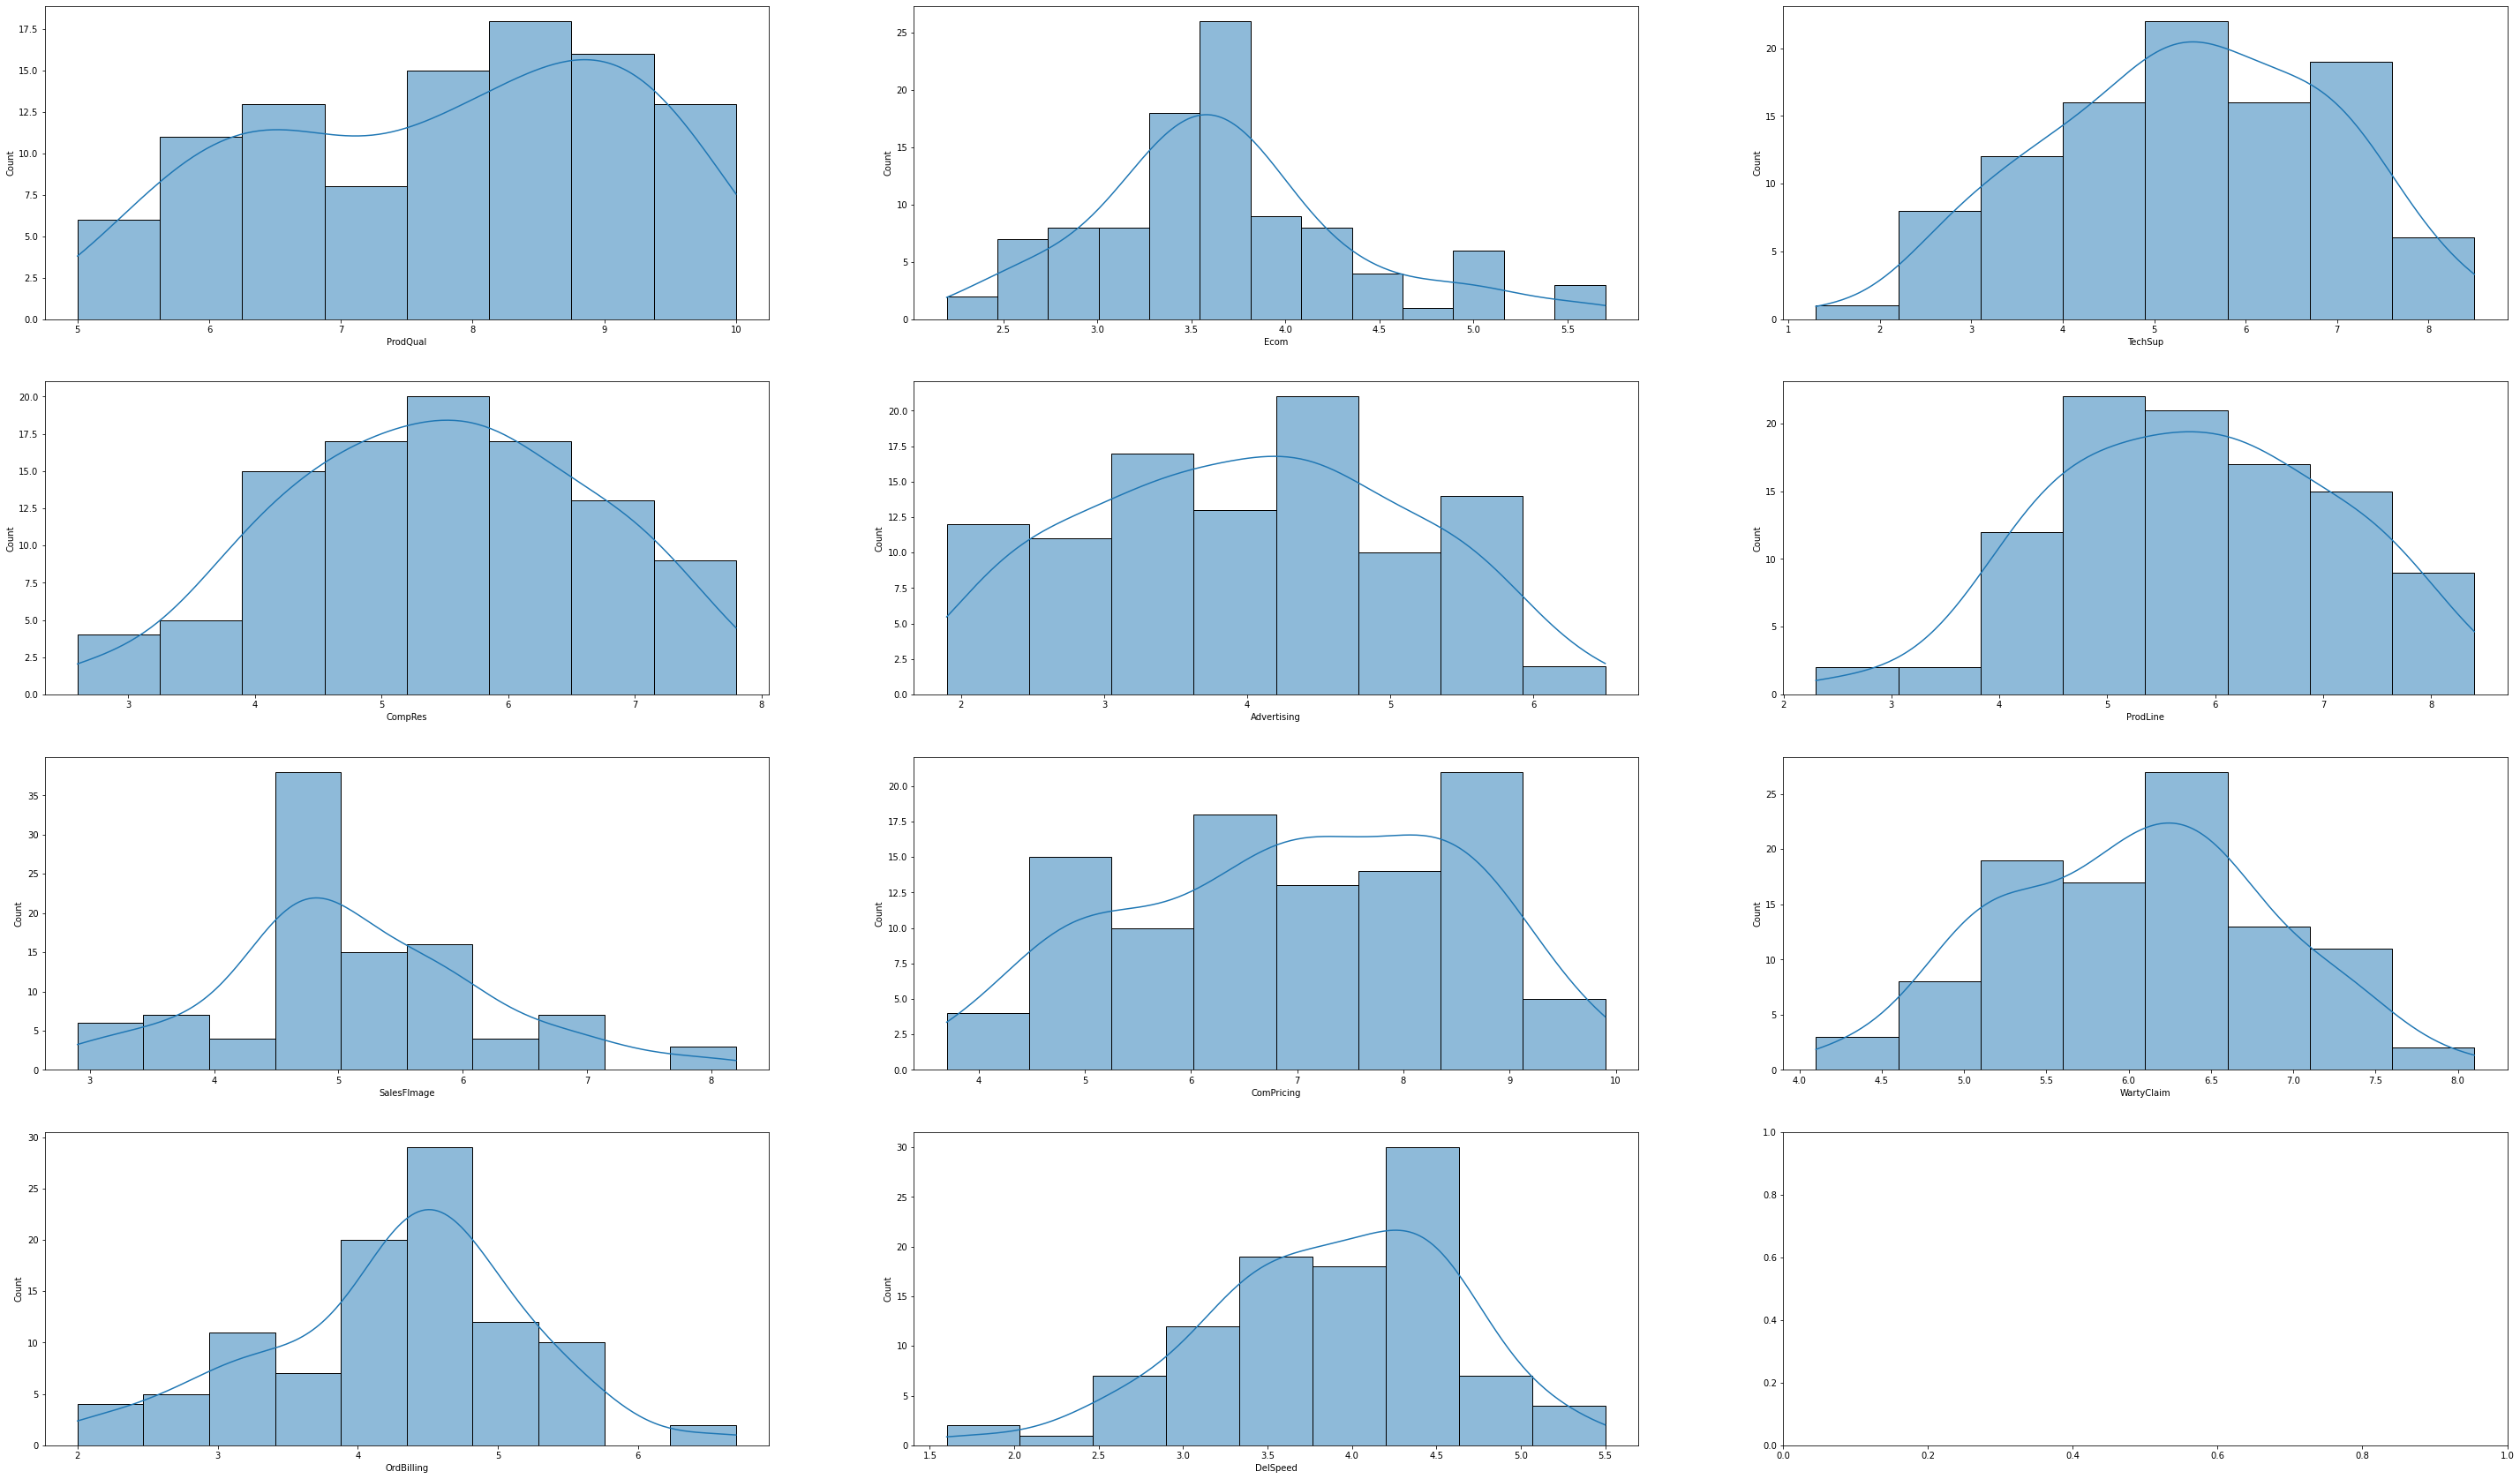

In [10]:
 fig, axes = plt.subplots(nrows=4,ncols=3)
fig.set_size_inches(50,30)
sns.histplot(df['ProdQual'] , kde=True, ax=axes[0][0])
sns.histplot(df['Ecom'] , kde=True, ax=axes[0][1])
sns.histplot(df['TechSup'] , kde=True, ax=axes[0][2])
sns.histplot(df['CompRes'] , kde=True, ax=axes[1][0])
sns.histplot(df['Advertising'] , kde=True, ax=axes[1][1])
sns.histplot(df['ProdLine'] , kde=True, ax=axes[1][2])
sns.histplot(df['SalesFImage'] , kde=True, ax=axes[2][0])
sns.histplot(df['ComPricing'] , kde=True, ax=axes[2][1])
sns.histplot(df['WartyClaim'] , kde=True, ax=axes[2][2])
sns.histplot(df['OrdBilling'] , kde=True, ax=axes[3][0])
sns.histplot(df['DelSpeed'] , kde=True, ax=axes[3][1])
plt.show()

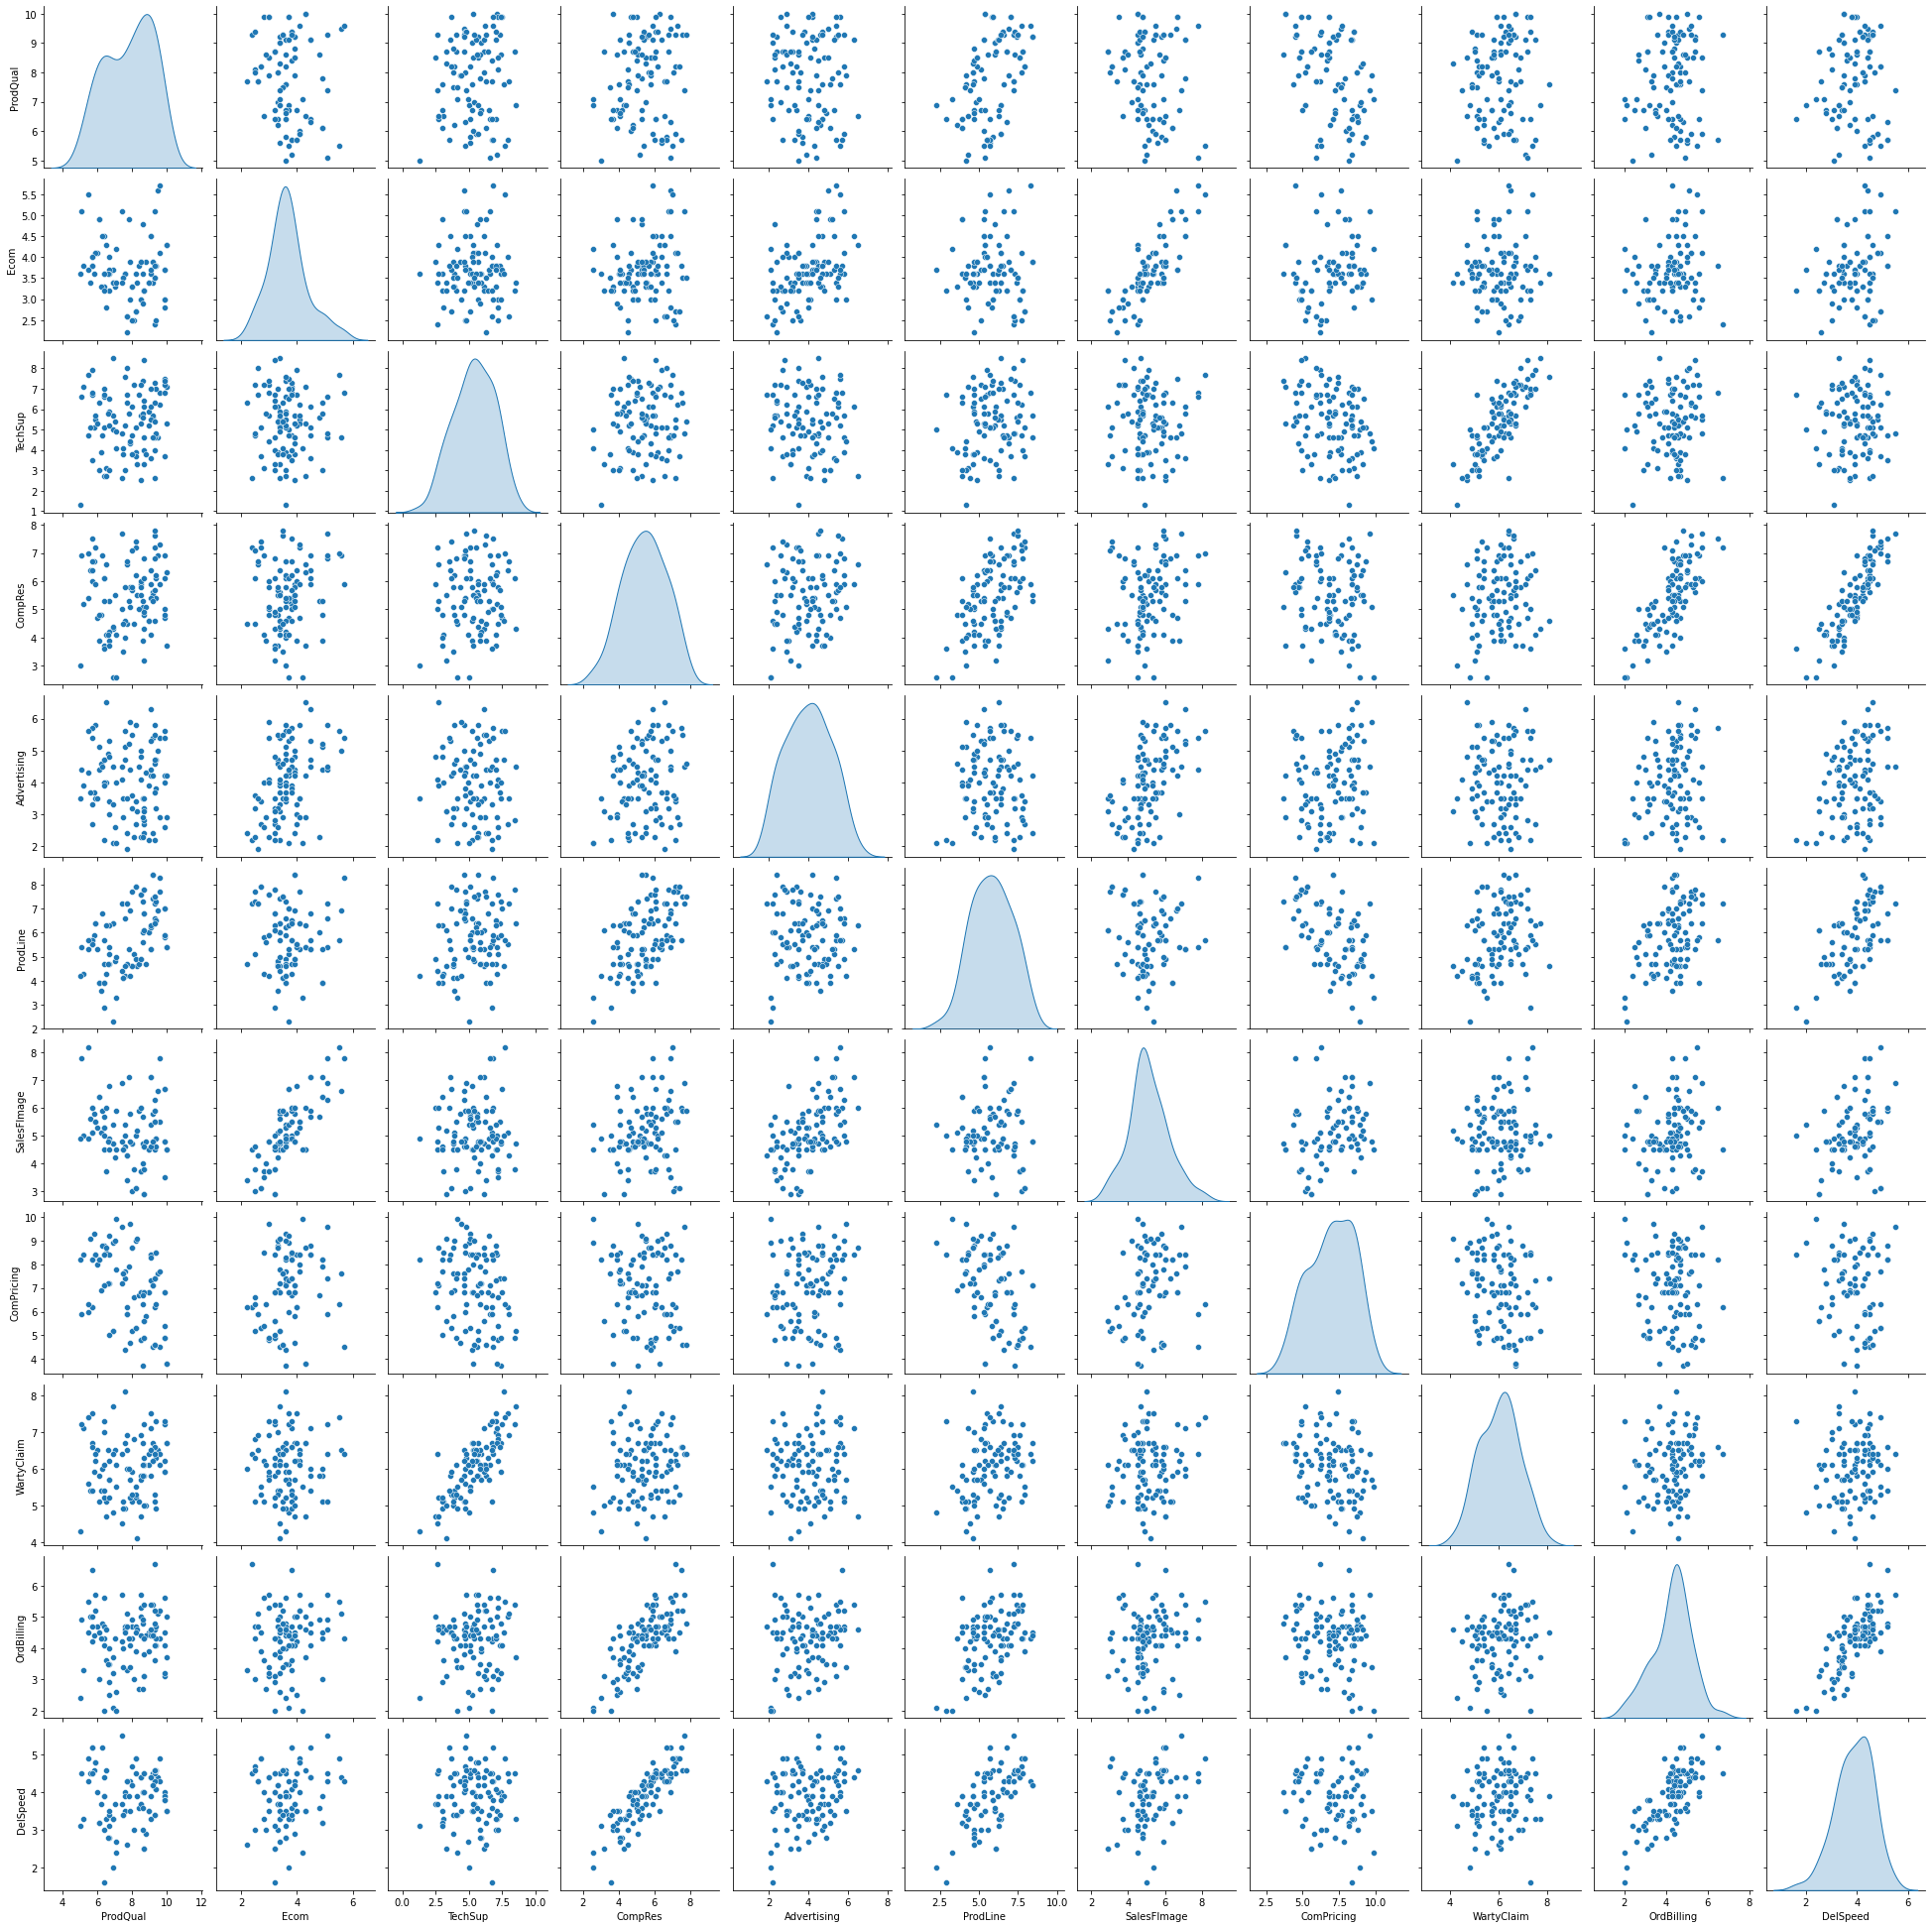

In [11]:
sns.pairplot(df, diag_kind="kde")

In [12]:
df.head(10)

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7
1,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9
2,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5
3,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0
4,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5
5,6.5,2.8,3.1,4.1,4.0,4.3,3.7,8.5,5.1,3.6,3.3
6,6.9,3.7,5.0,2.6,2.1,2.3,5.4,8.9,4.8,2.1,2.0
7,6.2,3.3,3.9,4.8,4.6,3.6,5.1,6.9,5.4,4.3,3.7
8,5.8,3.6,5.1,6.7,3.7,5.9,5.8,9.3,5.9,4.4,4.6
9,6.4,4.5,5.1,6.1,4.7,5.7,5.7,8.4,5.4,4.1,4.4


In [13]:
len(df.columns)

11

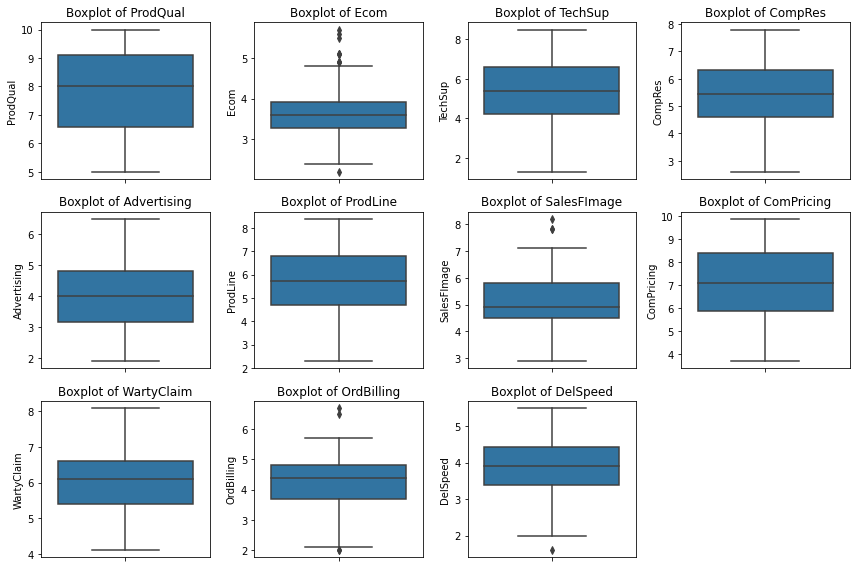

In [14]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,8))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [15]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [16]:
for i in feature_list:
    LL, UL = remove_outlier(df[i])
    df[i] = np.where(df[i] > UL, UL, df[i])
    df[i] = np.where(df[i] < LL, LL, df[i])

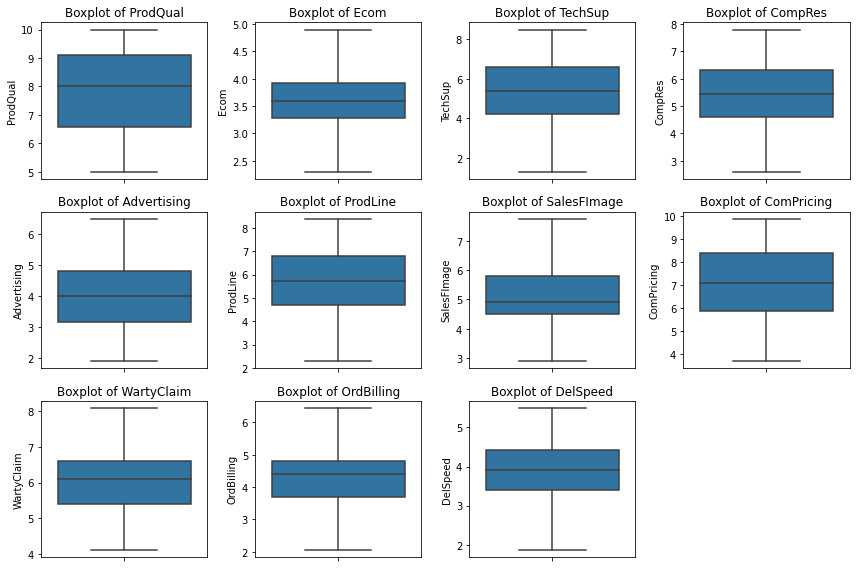

In [17]:
plt.figure(figsize = (12,8))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [18]:
#Check the descriptive stats to observe scale issues between the variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdQual,100.0,7.810000,1.396279,5.0000,6.575,8.00,9.100,10.00
Ecom,100.0,3.646000,0.635550,2.3000,3.275,3.60,3.925,4.90
TechSup,100.0,5.365000,1.530457,1.3000,4.250,5.40,6.625,8.50
CompRes,100.0,5.442000,1.208403,2.6000,4.600,5.45,6.325,7.80
Advertising,100.0,4.010000,1.126943,1.9000,3.175,4.00,4.800,6.50
ProdLine,100.0,5.805000,1.315285,2.3000,4.700,5.75,6.800,8.40
SalesFImage,100.0,5.117500,1.057617,2.9000,4.500,4.90,5.800,7.75
ComPricing,100.0,6.974000,1.545055,3.7000,5.875,7.10,8.400,9.90
WartyClaim,100.0,6.043000,0.819738,4.1000,5.400,6.10,6.600,8.10
OrdBilling,100.0,4.276000,0.918895,2.0500,3.700,4.40,4.800,6.45


In [19]:
#Scale the data
from scipy.stats import zscore
df_pca_scaled = df.apply(zscore)

In [20]:
df_pca_scaled.head(10)

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,0.496660,0.401668,-1.881421,0.380922,0.704543,-0.691530,0.838627,-0.113185,-1.646582,0.791872,-0.260903
1,0.280721,-1.495974,-0.174023,1.462141,-0.544014,1.600835,-1.917200,-1.088915,-0.665744,-0.411249,1.398918
2,1.000518,-0.389017,0.154322,0.131410,1.239639,1.218774,0.648570,-1.609304,0.192489,1.229371,0.845644
3,-1.014914,-0.547153,1.073690,-1.448834,0.615361,-0.844354,-0.586801,1.187789,1.173327,0.026250,-1.229132
4,0.856559,-0.389017,-0.108354,-0.700298,-1.614207,0.149004,-0.586801,-0.113185,0.069885,0.244999,-0.537540
5,-0.942934,-1.337837,-1.487406,-1.116151,-0.008918,-1.150003,-1.347029,0.992643,-1.156163,-0.739373,-0.814177
6,-0.655015,0.085394,-0.239692,-2.363712,-1.703389,-2.678246,0.268456,1.252837,-1.523977,-2.379992,-2.612317
7,-1.158873,-0.547153,-0.962053,-0.533956,0.526178,-1.684888,-0.016630,-0.048136,-0.788348,0.026250,-0.260903
8,-1.446792,-0.072743,-0.174023,1.046288,-0.276466,0.072592,0.648570,1.513032,-0.175325,0.135625,0.983963
9,-1.014914,1.350488,-0.174023,0.547263,0.615361,-0.080233,0.553541,0.927594,-0.788348,-0.192499,0.707326


In [21]:
df_pca_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdQual,100.0,8.744394e-16,1.005038,-2.022630,-0.888949,0.136761,0.928538,1.576356
Ecom,100.0,7.260859e-16,1.005038,-2.128522,-0.586688,-0.072743,0.441202,1.983036
TechSup,100.0,1.015854e-15,1.005038,-2.669451,-0.732211,0.022984,0.827431,2.058728
CompRes,100.0,-1.343370e-16,1.005038,-2.363712,-0.700298,0.006654,0.734398,1.961166
Advertising,100.0,-5.884182e-16,1.005038,-1.881755,-0.744675,-0.008918,0.704543,2.220649
ProdLine,100.0,2.353673e-16,1.005038,-2.678246,-0.844354,-0.042027,0.760301,1.982896
SalesFImage,100.0,2.747802e-16,1.005038,-2.107257,-0.586801,-0.206687,0.648570,2.501625
ComPricing,100.0,-7.016610e-16,1.005038,-2.129693,-0.714885,0.081961,0.927594,1.903324
WartyClaim,100.0,-1.274536e-15,1.005038,-2.382210,-0.788348,0.069885,0.682908,2.521979
OrdBilling,100.0,6.217249e-17,1.005038,-2.434679,-0.629998,0.135625,0.573123,2.377804


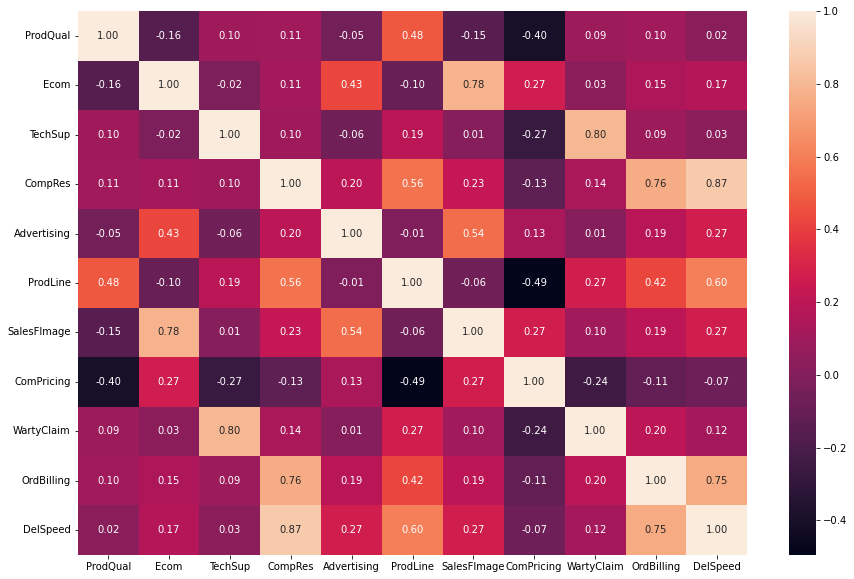

In [22]:
plt.figure(figsize = (15,10))
sns.heatmap(df_pca_scaled.corr(), annot=True,fmt='.2f');

In [23]:
df_pca_scaled.corr()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.000000,-0.161588,0.095600,0.106370,-0.053473,0.477493,-0.146498,-0.401282,0.088312,0.102495,0.024332
Ecom,-0.161588,1.000000,-0.018786,0.109386,0.425123,-0.096342,0.779244,0.268064,0.027380,0.146505,0.168147
TechSup,0.095600,-0.018786,1.000000,0.096657,-0.062870,0.192625,0.009836,-0.270787,0.797168,0.085443,0.028898
CompRes,0.106370,0.109386,0.096657,1.000000,0.196917,0.561417,0.226647,-0.127954,0.140408,0.757995,0.868846
Advertising,-0.053473,0.425123,-0.062870,0.196917,1.000000,-0.011551,0.542923,0.134217,0.010792,0.188005,0.272973
ProdLine,0.477493,-0.096342,0.192625,0.561417,-0.011551,1.000000,-0.062584,-0.494948,0.273078,0.423870,0.600272
SalesFImage,-0.146498,0.779244,0.009836,0.226647,0.542923,-0.062584,1.000000,0.271246,0.100953,0.194695,0.271213
ComPricing,-0.401282,0.268064,-0.270787,-0.127954,0.134217,-0.494948,0.271246,1.000000,-0.244986,-0.113318,-0.070289
WartyClaim,0.088312,0.027380,0.797168,0.140408,0.010792,0.273078,0.100953,-0.244986,1.000000,0.198106,0.116168
OrdBilling,0.102495,0.146505,0.085443,0.757995,0.188005,0.423870,0.194695,-0.113318,0.198106,1.000000,0.752298


In [24]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_pca_scaled)
p_value

2.4065841179747265e-98

In [25]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_pca_scaled)
kmo_model

0.6499925764140824

In [26]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=11, random_state=1)
pca_transformed = pca.fit_transform(df_pca_scaled)

In [27]:
#Co_variance of Matrix
pca_transformed

array([[ 0.10344791,  1.58213555,  1.89112526, ...,  0.44104333,
         0.01893011, -0.34032525],
       [-1.18573959, -2.44710936,  2.06298265, ..., -0.53918376,
         0.47678856,  0.19196525],
       [-2.2333507 , -0.65905232,  0.15672563, ...,  0.41601305,
        -0.78858927,  0.17260237],
       ...,
       [ 3.17594204, -1.97972904,  1.35512323, ..., -0.59109302,
         0.08848525, -0.33314252],
       [-0.55729898,  2.48870225, -1.17636337, ..., -0.19293389,
        -0.20339385,  0.00874455],
       [ 1.65391773,  1.16411338,  0.40991566, ...,  0.16952565,
         0.34204177, -0.04542874]])

In [28]:
#Extract eigen vectors
pca.components_

array([[-0.13862521, -0.13255163, -0.16169816, -0.47353676, -0.1761158 ,
        -0.39268125, -0.18960766,  0.15780895, -0.21620195, -0.44059722,
        -0.47527939],
       [-0.30616255,  0.46140667, -0.22578297,  0.03265571,  0.3640688 ,
        -0.27255203,  0.47203851,  0.40962005, -0.18553872,  0.04338501,
         0.08704893],
       [ 0.06709281, -0.22881574, -0.61626115,  0.20638388, -0.0906638 ,
         0.11796883, -0.23760663,  0.04673072, -0.60432141,  0.15770584,
         0.22342129],
       [ 0.64972486,  0.25658155, -0.18140816, -0.20421824,  0.33265598,
         0.20316157,  0.2349916 , -0.32936184, -0.17150521, -0.22900266,
        -0.19979577],
       [ 0.29035482,  0.40547352, -0.00914631,  0.02569798, -0.78168324,
         0.11128718,  0.19275175,  0.29415447, -0.01839439,  0.04402211,
        -0.03422493],
       [ 0.52977297, -0.30406454,  0.10842621,  0.03136166,  0.25830325,
        -0.10856804, -0.12869836,  0.69840604,  0.13820704,  0.10792548,
        -0.023

In [29]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([3.44279526, 2.6122913 , 1.69477856, 1.09242995, 0.61718431,
       0.54958841, 0.40600754, 0.24943513, 0.21516867, 0.13335371,
       0.09807827])

In [30]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.30985157, 0.23510622, 0.15253007, 0.0983187 , 0.05554659,
       0.04946296, 0.03654068, 0.02244916, 0.01936518, 0.01200183,
       0.00882704])

In [31]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11',],
                                    index = df_pca_scaled.columns)

In [32]:
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
ProdQual,-0.138625,-0.306163,0.067093,0.649725,0.290355,0.529773,0.194628,0.133170,0.011832,0.089366,0.178039
Ecom,-0.132552,0.461407,-0.228816,0.256582,0.405474,-0.304065,0.075192,-0.189381,-0.521680,0.281953,0.036228
TechSup,-0.161698,-0.225783,-0.616261,-0.181408,-0.009146,0.108426,-0.003401,0.419702,-0.412374,-0.389764,-0.014796
CompRes,-0.473537,0.032656,0.206384,-0.204218,0.025698,0.031362,-0.008439,0.514016,0.016904,0.505659,-0.410479
Advertising,-0.176116,0.364069,-0.090664,0.332656,-0.781683,0.258303,-0.048396,-0.077503,-0.157408,0.027316,-0.077043
ProdLine,-0.392681,-0.272552,0.117969,0.203162,0.111287,-0.108568,-0.607041,-0.343743,-0.074504,-0.265465,-0.359823
SalesFImage,-0.189608,0.472039,-0.237607,0.234992,0.192752,-0.128698,-0.035329,0.257041,0.620785,-0.346361,-0.056360
ComPricing,0.157809,0.409620,0.046731,-0.329362,0.294154,0.698406,-0.299486,-0.109933,-0.082015,-0.061138,-0.100528
WartyClaim,-0.216202,-0.185539,-0.604321,-0.171505,-0.018394,0.138207,-0.039125,-0.405427,0.364965,0.445864,0.082935
OrdBilling,-0.440597,0.043385,0.157706,-0.229003,0.044022,0.107925,0.663117,-0.368618,-0.020927,-0.330354,-0.167085


In [33]:
#df_extracted_loadings.iloc[:1]

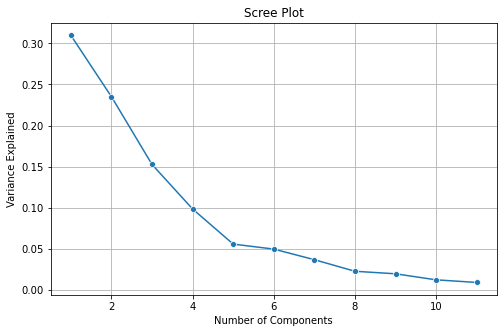

In [34]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,12),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [35]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.30985157, 0.54495779, 0.69748786, 0.79580656, 0.85135314,
       0.9008161 , 0.93735678, 0.95980594, 0.97917112, 0.99117296,
       1.        ])

In [36]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5']]

In [37]:
#Check the selected PCs
df_selected

,PC1,PC2,PC3,PC4,PC5
ProdQual,-0.138625,-0.306163,0.067093,0.649725,0.290355
Ecom,-0.132552,0.461407,-0.228816,0.256582,0.405474
TechSup,-0.161698,-0.225783,-0.616261,-0.181408,-0.009146
CompRes,-0.473537,0.032656,0.206384,-0.204218,0.025698
Advertising,-0.176116,0.364069,-0.090664,0.332656,-0.781683
ProdLine,-0.392681,-0.272552,0.117969,0.203162,0.111287
SalesFImage,-0.189608,0.472039,-0.237607,0.234992,0.192752
ComPricing,0.157809,0.409620,0.046731,-0.329362,0.294154
WartyClaim,-0.216202,-0.185539,-0.604321,-0.171505,-0.018394
OrdBilling,-0.440597,0.043385,0.157706,-0.229003,0.044022


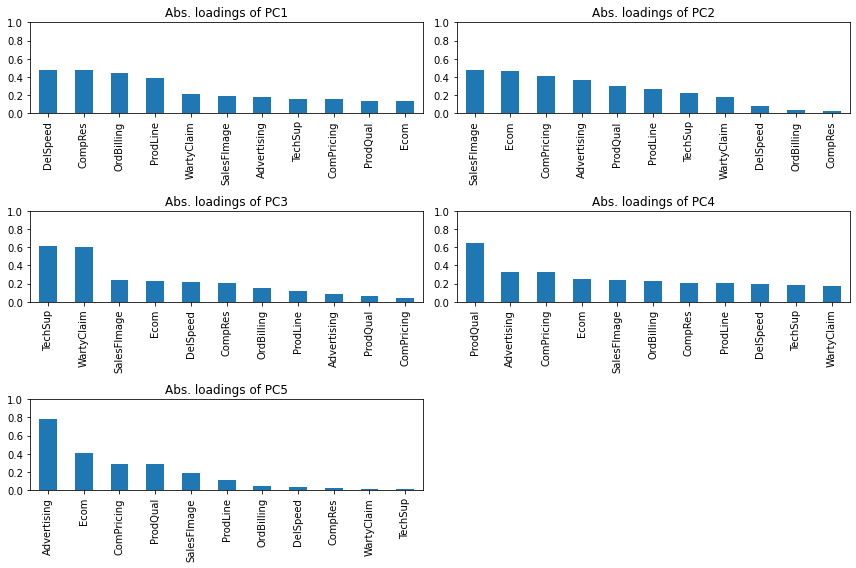

In [38]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (12,8))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

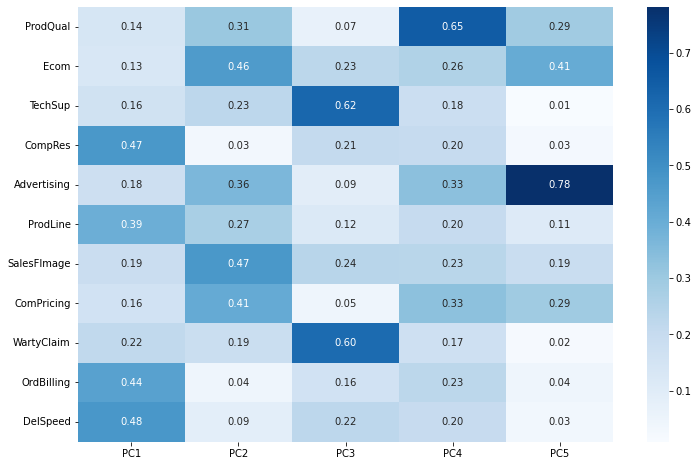

In [39]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,8))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [40]:
#In order to calculate PC scores we need loadings, below:
df_selected

,PC1,PC2,PC3,PC4,PC5
ProdQual,-0.138625,-0.306163,0.067093,0.649725,0.290355
Ecom,-0.132552,0.461407,-0.228816,0.256582,0.405474
TechSup,-0.161698,-0.225783,-0.616261,-0.181408,-0.009146
CompRes,-0.473537,0.032656,0.206384,-0.204218,0.025698
Advertising,-0.176116,0.364069,-0.090664,0.332656,-0.781683
ProdLine,-0.392681,-0.272552,0.117969,0.203162,0.111287
SalesFImage,-0.189608,0.472039,-0.237607,0.234992,0.192752
ComPricing,0.157809,0.409620,0.046731,-0.329362,0.294154
WartyClaim,-0.216202,-0.185539,-0.604321,-0.171505,-0.018394
OrdBilling,-0.440597,0.043385,0.157706,-0.229003,0.044022


In [41]:
#...and we need the original scaled features
df_pca_scaled.iloc[0]

ProdQual       0.496660
Ecom           0.401668
TechSup       -1.881421
CompRes        0.380922
Advertising    0.704543
ProdLine      -0.691530
SalesFImage    0.838627
ComPricing    -0.113185
WartyClaim    -1.646582
OrdBilling     0.791872
DelSpeed      -0.260903
Name: 0, dtype: float64

In [42]:
#We need to perform a dot product between the loadings and features to obtain the scores
for i in df_selected.columns:
    pc_score = np.dot(df_selected[i], df_pca_scaled.iloc[0])
    print(round(pc_score, 6), end = ' ')

0.103448 1.582136 1.891125 1.170678 -0.091188 

In [43]:
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=5, random_state=1)
pca_final = pca.fit_transform(df_pca_scaled)

In [44]:
pca_final

array([[ 1.03447909e-01,  1.58213555e+00,  1.89112526e+00,
         1.17067757e+00, -9.11878218e-02],
       [-1.18573959e+00, -2.44710936e+00,  2.06298265e+00,
        -4.87237681e-01, -6.26092925e-01],
       [-2.23335070e+00, -6.59052319e-01,  1.56725625e-01,
         1.35435014e+00, -1.02537094e+00],
       [ 1.56651425e+00,  1.08694681e-01, -1.84359161e+00,
        -1.15631226e+00, -8.80650288e-01],
       [ 7.33564748e-01, -1.44092341e+00,  2.43099896e-01,
         5.13717168e-02,  1.23384172e+00],
       [ 2.90499826e+00,  1.63293836e-01,  1.56090902e+00,
        -8.07953102e-01, -9.03399669e-01],
       [ 5.35572860e+00,  9.18692764e-01, -6.08373997e-01,
        -9.46101504e-03,  1.25228377e+00],
       [ 1.48897658e+00,  1.05003570e+00,  7.07617776e-01,
        -5.83770634e-01, -1.15485262e+00],
       [-6.10638976e-01,  1.41239502e+00,  5.40165304e-01,
        -1.76151099e+00,  3.48685744e-01],
       [-3.85689008e-01,  2.07766020e+00,  2.93739148e-01,
        -3.42161757e-01

In [45]:
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5
0,0.103448,1.582136,1.891125,1.170678,-0.091188
1,-1.185740,-2.447109,2.062983,-0.487238,-0.626093
2,-2.233351,-0.659052,0.156726,1.354350,-1.025371
3,1.566514,0.108695,-1.843592,-1.156312,-0.880650
4,0.733565,-1.440923,0.243100,0.051372,1.233842
5,2.904998,0.163294,1.560909,-0.807953,-0.903400
6,5.355729,0.918693,-0.608374,-0.009461,1.252284
7,1.488977,1.050036,0.707618,-0.583771,-1.154853
8,-0.610639,1.412395,0.540165,-1.761511,0.348686
9,-0.385689,2.077660,0.293739,-0.342162,0.139982


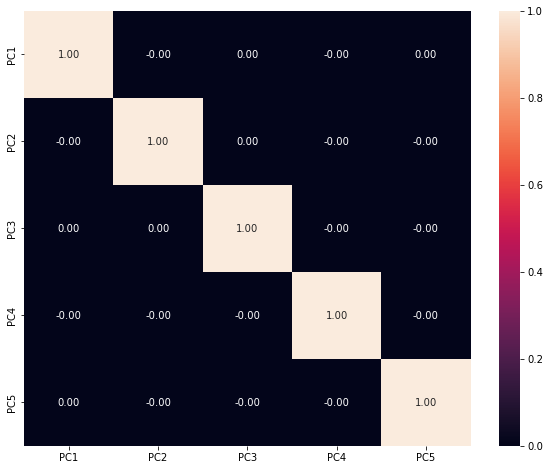

In [46]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');